In [52]:
# import library pandas
import pandas as pd
import numpy as np
# Import training data as train
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")
# Import testing data as test
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")

### Taking a look at the data

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Storing total number of observation in training dataset
train_length = len(train)
# Storing total number of columns in testing data set
test_col = len(test.columns)

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
df1=train.Property_Area.value_counts()
print (df1)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


### Distributions of ApplicantIncome and LoanIncome

<AxesSubplot:>

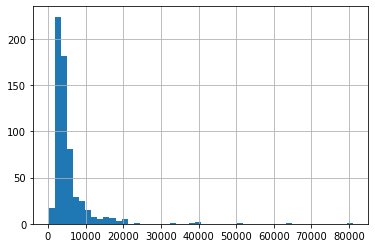

In [7]:
train.ApplicantIncome.hist(bins=50)

<AxesSubplot:>

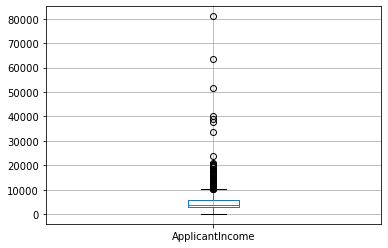

In [8]:
train.boxplot(column='ApplicantIncome')

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Gender'>

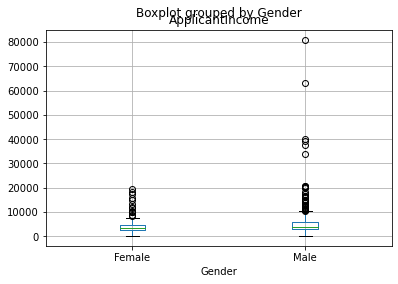

In [9]:
train.boxplot(column='ApplicantIncome', by='Gender')

<AxesSubplot:>

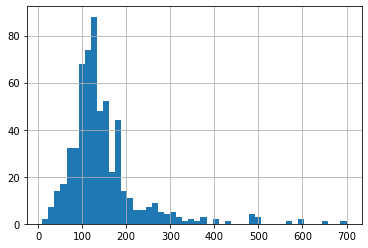

In [10]:
train.LoanAmount.hist(bins=50)

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

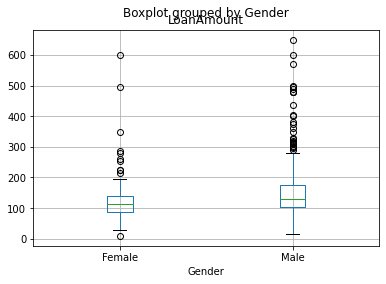

In [11]:
train.boxplot(column='LoanAmount', by = 'Gender')

### Distributions of Gender and LoanStatus

In [12]:
pd.crosstab( train ['Gender'], train ["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [13]:
pd.crosstab(train ["Gender"], train ["Loan_Status"], margins=True, normalize=True)

Loan_Status,N,Y,All
Gender,,,
Female,0.061564,0.124792,0.186356
Male,0.249584,0.564060,0.813644
All,0.311148,0.688852,1.000000


### n. of loans approved

In [37]:
loan_approval = train['Loan_Status'].value_counts()['Y']
loan_approval

422

### Loans approval by credit history

In [15]:
pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


### Checking on missing values

In [27]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### filling missing values on LoanAmount with the mean

In [43]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)
train['LoanAmount']

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

### filling missing values on Self_Employed with 'no' -with the value which has highest frequency

In [41]:
train['Self_Employed'].fillna('No',inplace=True)
train['Self_Employed']

0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object

### Imputing missing values with more frequent category of Gender and Credit History

In [44]:
#Using value_counts() to check more frequent category of variable
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [45]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [47]:
train['Gender'].fillna ('Male',inplace=True)
train['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [50]:
train['Credit_History'].fillna(1.0,inplace=True)
train['Credit_History']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

<AxesSubplot:>

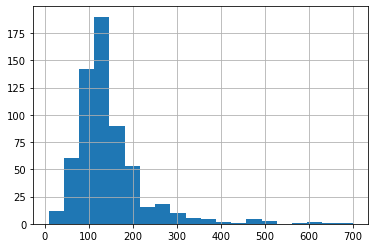

In [51]:
train ['LoanAmount'].hist(bins=20)

## Treating / Tranforming extreme values of LoanAmount and ApplicantIncome

<AxesSubplot:>

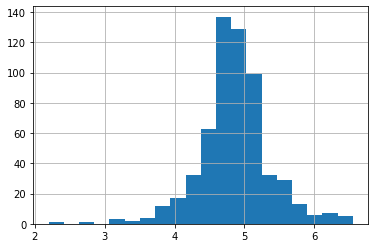

In [53]:
#Since the extreme values are practically possible, instead of treating them as outliers, we do a log transformation to nullify their effect
train ['LoanAmount_log'] = np.log(train['LoanAmount'])
train ['LoanAmount_log'].hist(bins=20)

In [54]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0


<AxesSubplot:>

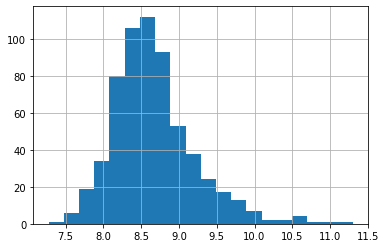

In [55]:
train['TotalIncome_log']= np.log(train['TotalIncome'])
train ['TotalIncome_log'].hist(bins=20)

## Labelling categories of Gender  and Married to number

In [58]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

train['Gender'] = number.fit_transform(train['Gender'].astype(str))
train['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int32

In [59]:
number = LabelEncoder()
train['Married_new'] = number.fit_transform(train['Married'].astype(str))
train['Married_new']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married_new, Length: 614, dtype: int32